In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [2]:
df=pd.read_csv('OCT_clean.csv')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# define an encoding function 

def encoding(df):
    ''' column for label encoding''' 
    Le=LabelEncoder()
    Le.fit(df)
    outdf=Le.transform(df)
    return outdf
    

# data feature engineering 

### Endoing "giver" and "receiver" together since they have same category

In [4]:
# Label encode Gender data 
pdconcat=pd.concat([df['giver_gender'],df['receiver_gender']])
pdconcat_code=encoding(pdconcat)
dfn=pd.DataFrame({'giver_gender':pdconcat_code[:int(pdconcat_code.shape[0]/2)],
                  'receiver_gender':pdconcat_code[int(pdconcat_code.shape[0]/2):]})

In [5]:
# Label encode user_key data 
pdconcat=pd.concat([df['giver_user_key'],df['receiver_user_key']])
pdconcat_code=encoding(pdconcat)
dfn['giver_user_key']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_user_key']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [6]:
# label encoder 
pdconcat=pd.concat([df['giver_manager_user_key'],df['receiver_manager_user_key']])
pdconcat_code=encoding(pdconcat)
dfn['giver_manager_user_key']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_manager_user_key']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [7]:
# label encoder city
pdconcat=pd.concat([df['giver_city'],df['receiver_city']])
pdconcat_code=encoding(pdconcat)
dfn['giver_city']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_city']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [8]:
# label encod employee id 
pdconcat=pd.concat([df['giver_employee_id'],df['receiver_employee_id']])
pdconcat=pdconcat.replace(to_replace='M',method='ffill')
pdconcat=pdconcat.replace(to_replace=-9999,method='ffill')
pdconcat=pdconcat.apply(lambda x:str(x))
pdconcat_code=encoding(pdconcat)
dfn['giver_employee_id']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_employee_id']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [9]:
# label encode giver status
giver_status=df['giver_status'].replace(to_replace='M',method='ffill')
giver_status.value_counts()
dfn['giver_status']=encoding(giver_status)

In [10]:
# covert date to year, month and day 
transaction_date=df['transaction_date_key'].replace(to_replace=-1,method='ffill') 
transaction_date=transaction_date.replace(to_replace=-9999,method='ffill')
transaction_date=pd.to_datetime(transaction_date,format='%Y%m%d')
dfn['transcation_year_key']=transaction_date.apply(lambda x:x.year)
dfn['transcation_month_key']=transaction_date.apply(lambda x:x.month)
dfn['transcation_day_key']=transaction_date.apply(lambda x:x.day)

giver_date=df['giver_effective_date'].replace(to_replace=-1,method='ffill') 
giver_date=giver_date.replace(to_replace=-9999,method='ffill')
giver_date=pd.to_datetime(giver_date,format='%Y%m%d')
dfn['giver_effective_year']=giver_date.apply(lambda x:x.year)
dfn['giver_effective_month']=giver_date.apply(lambda x:x.month)
dfn['giver_effective_day']=giver_date.apply(lambda x:x.day)

receiver_date=df['giver_effective_date'].replace(to_replace=-1,method='ffill') 
receiver_date=receiver_date.replace(to_replace=-9999,method='ffill')
receiver_date=pd.to_datetime(receiver_date,format='%Y%m%d')
dfn['receiver_effective_year']=receiver_date.apply(lambda x:x.year)
dfn['receiver_effective_month']=receiver_date.apply(lambda x:x.month)
dfn['receiver_effective_day']=receiver_date.apply(lambda x:x.day)

In [11]:
dfn['recognition_type_key']=df['recognition_type_key']

In [12]:
program_name=df['program_name'].replace(to_replace=-9999,method='ffill')
dfn['program_name']=encoding(program_name)

In [13]:
pdconcat=pd.concat([df['giver_business_unit_name'],df['receiver_business_unit_name']])
pdconcat_code=encoding(pdconcat)
dfn['giver_business_unit_name']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_business_unit_name']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [14]:
pdconcat=pd.concat([df['giver_parent_business_unit_name'],df['receiver_parent_business_unit_name']])
pdconcat_code=encoding(pdconcat)
dfn['giver_parent_business_unit_name']=pdconcat_code[:int(pdconcat_code.shape[0]/2)]
dfn['receiver_parent_business_unit_name']=pdconcat_code[int(pdconcat_code.shape[0]/2):]

In [15]:
Cor_val=df['corporate_value'].replace(to_replace=-9999,method='ffill')
dfn['corporate_value']=encoding(Cor_val)

In [16]:
receiver_buk=df['receiver_business_unit_key'].replace(to_replace=-1,method='ffill') 
receiver_buk=receiver_buk.replace(to_replace=-9999,method='ffill')
dfn['receiver_business_unit_key']=encoding(receiver_buk)

In [17]:
recog_encod=LabelEncoder()
recog_encod.fit(df['recognition_points_US$'])
recog=pd.DataFrame({'recognition_points_US_encode':recog_encod.transform(df['recognition_points_US$'])})

dfn['recognition_points_US']=df['recognition_points_US$']

# Build Model

In [18]:
# build model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:


x=dfn.iloc[:,:-1].values
y=dfn.iloc[:,-1].values
y_=np.array(recog['recognition_points_US_encode'])



In [20]:
# split date into train and validation and test part

x_model,x_test,y_encode_model,y_encode_test=train_test_split(x,y_,test_size=0.3,random_state=100)

x_train,x_validation,y_encode_train,y_encode_validation=train_test_split(x_model,y_encode_model,test_size=0.2,random_state=100)

In [37]:
# 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1,KNN cluster 

In [22]:
KNN=KNeighborsClassifier(n_neighbors=8,weights='distance',n_jobs=-1)
KNN.fit(x_train,y_encode_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='distance')

In [23]:
# Validation: using validation data to tune the parameters

# since "recognition_point_US$" is categorical data and each categorical have different value; 
# so using "accuracy_score" as measure metricx

y_knn=KNN.predict(x_validation)
accuracy_score(y_knn,y_encode_validation)

0.870248447204969

In [24]:
# test the model 
y_test_predict=KNN.predict(x_test)
accuracy_score(y_test_predict,y_encode_test)

0.8698204231217724

In [25]:
KNN.predict_proba(x_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


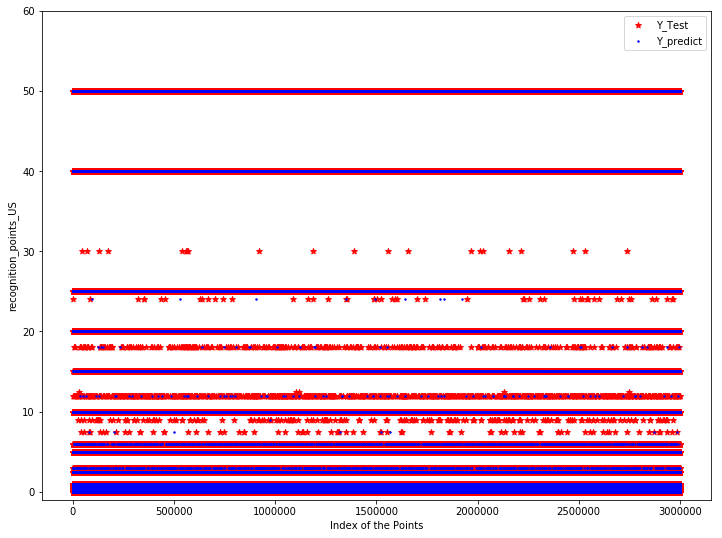

In [26]:
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_test_predict)),recog_encod.inverse_transform(y_encode_test),color='red',marker='*',label='Y_Test')
plt.scatter(range(len(y_test_predict)),recog_encod.inverse_transform(y_test_predict),color='blue',s=2, label='Y_predict')
plt.xlabel('Index of the Points')
plt.ylabel('recognition_points_US')
plt.ylim(-1,60)
plt.legend(bbox_to_anchor=(1, 1),loc=1)

# 2,Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

DT.fit(x_train,y_encode_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_validate=DT.predict(x_validation)
accuracy_score(y_validate,y_encode_validation)

0.9587491968301564

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


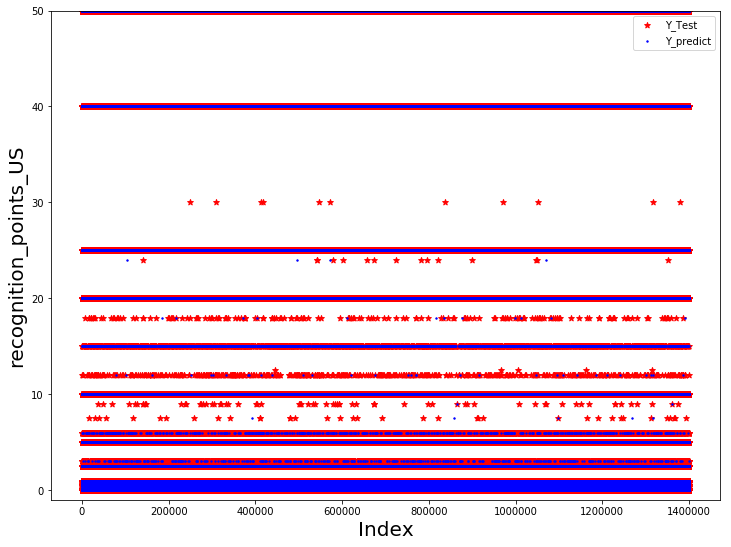

In [29]:
# Model validation: tune parameters
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_validate)),recog_encod.inverse_transform(y_encode_validation),
            color='red',marker='*',label='Y_Test')
plt.scatter(range(len(y_validate)),recog_encod.inverse_transform(y_validate),color='blue',s=2, label='Y_predict')
plt.xlabel('Index',size=20)
plt.ylabel('recognition_points_US',size=20)
plt.ylim(-1,50)
plt.legend(bbox_to_anchor=(1, 1),loc=1)

In [30]:
# test overfitting of model
y_pre=DT.predict(x_test)
accuracy_score(y_pre,y_encode_test)

0.9584690987839414

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


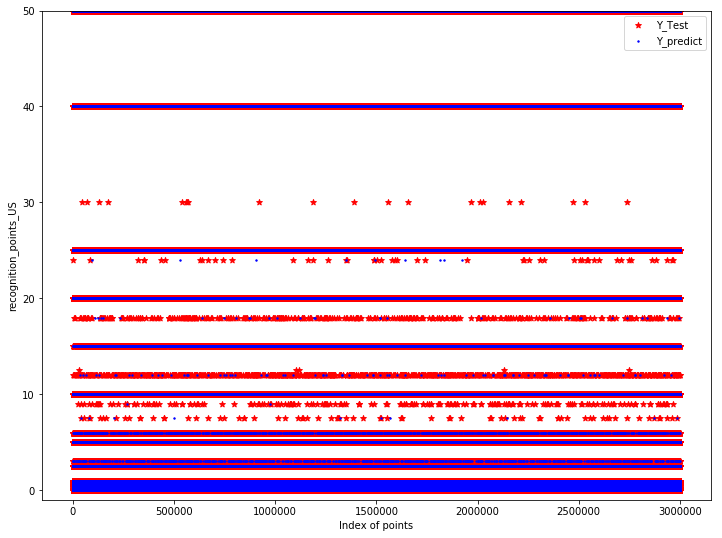

In [31]:
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_encode_test)),recog_encod.inverse_transform(y_encode_test),color='red',marker='*',label='Y_Test')
plt.hold
plt.scatter(range(len(y_encode_test)),recog_encod.inverse_transform(y_pre),color='blue',s=2, label='Y_predict')
plt.xlabel('Index of points')
plt.ylabel('recognition_points_US')
plt.ylim(-1,50)
plt.legend(loc=1)

#  3,Randomforest model 

In [38]:
RFR=RandomForestClassifier(n_estimators=10)

RFR.fit(x_train,y_encode_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_validate=RFR.predict(x_validation)
accuracy_score(y_validate,y_encode_validation)

0.9594374241450703

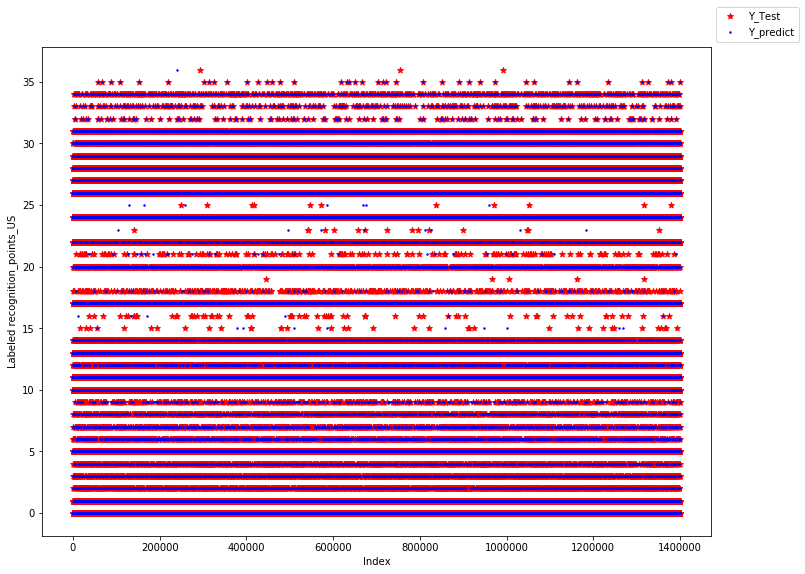

In [45]:
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_validate)),y_encode_validation,color='red',marker='*',label='Y_Test')
plt.scatter(range(len(y_validate)),y_validate,color='blue',s=2, label='Y_predict')
plt.xlabel('Index')
plt.ylabel('Labeled recognition_points_US')
#plt.ylim(-1,5)
plt.legend(bbox_to_anchor=(1, 1),loc=3)

In [46]:
y_test_pre=RFR.predict(x_test)
accuracy_score(y_test_pre,y_encode_test)

0.959103448275862

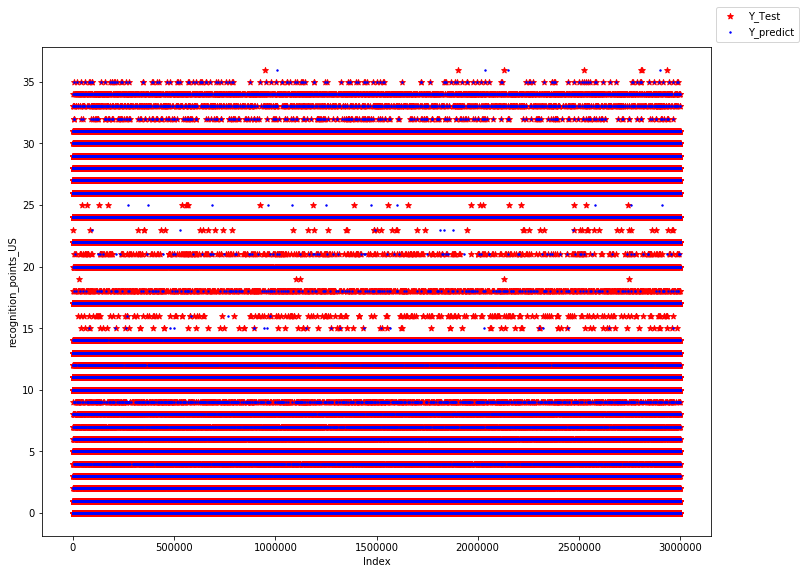

In [44]:
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_test_pre)),y_encode_test,color='red',marker='*',label='Y_Test')
plt.scatter(range(len(y_test_pre)),y_test_pre,color='blue',s=2, label='Y_predict')
plt.xlabel('Index')
plt.ylabel('recognition_points_US')
#plt.ylim(-1,5)
plt.legend(bbox_to_anchor=(1, 1),loc=3)

In [140]:
### The fitness of number of 15 and 16,19,21,25 category of "recognition_points_US" is not as good as others; 
category=[15,16,19,21,25]
df_not_fit_recog=[]
df_not_fit_shape=[]
for i in category:
    df_not_fit=df[recog['recognition_points_US_encode']==i]
    df_not_fit_recog.append(df_not_fit['recognition_points_US$'].iloc[0])
    df_not_fit_shape.append(df_not_fit.shape[0])
df_not_fit_recog
#sum(df_not_fit_shape)    # so the total number is only 2091, 
                          #so the reason why thest 5 recognition_points_US,as 7.5,9.0,12.5,18.0,30.0, 
                         #does not fit model well is that the sample data is too small
                   

[7.5, 9.0, 12.5, 18.0, 30.0]

# component analysis
# tool: PCA 

In [47]:
# Key performance indicator analysis
# USing principlec component analysis
decom=PCA()
decom.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'weight of component')

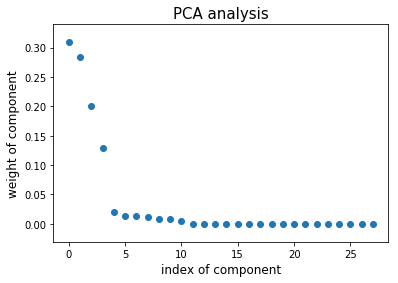

In [48]:
weight=decom.explained_variance_ratio_     # variance_ratio for each component; sorted

plt.scatter(range(len(weight)),weight)
plt.title('PCA analysis',size=15)
plt.xlabel('index of component',size=12)
plt.ylabel('weight of component',size=12)

# so first 4 component is most important

In [49]:
# write out the first 4 component of PCA analysis 

component=decom.components_
columns=dfn.iloc[:,:-1].columns
df_component=pd.DataFrame(component,index=columns)
df_component.iloc[:,0:4].round(5)

,0,1,2,3
giver_gender,0.00009,0.00006,0.05562,-0.13830
receiver_gender,0.00001,0.00003,-0.01367,0.99009
giver_user_key,0.00005,-0.00000,0.99785,0.02141
receiver_user_key,-0.00004,0.00011,0.01306,-0.00687
giver_manager_user_key,0.00003,-0.00009,0.00141,-0.00556
receiver_manager_user_key,-0.00004,-0.00009,-0.00528,-0.00584
giver_city,-0.00019,-0.00011,-0.00548,0.00067
receiver_city,0.00006,0.00012,0.01277,-0.00208
giver_employee_id,0.00010,0.00005,0.00659,0.00106
receiver_employee_id,0.00011,0.00007,0.02372,-0.00150


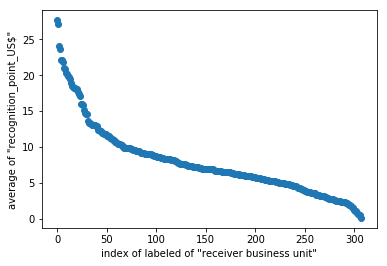

In [56]:
# plot of "receiver_business_unit_name" and "recognition_points_US$"

df_gb_RBUN=df.groupby('receiver_business_unit_name').mean().sort_values(by=['recognition_points_US$'],ascending=False)

plt.scatter(range(df_gb_RBUN.shape[0]),df_gb_RBUN['recognition_points_US$'])
plt.xlabel('index of labeled of "receiver business unit"')
plt.ylabel('average of "recognition_point_US$"')
plt.savefig('RBU_avg_RPU')

# 

In [57]:
# The first 10 "reciever_business_unit" with largest average recognition points are: 
df_gb_RBUN.index[:10]

Int64Index([-4830324189249560576, -1064809838137528192,  7013784171120343040,
            -2772652933074923520, -8630711160444276736,  2876589429619272704,
            -8934097839553328128, -1309274747023870208,  2867098660434973696,
             6119301991719317504],
           dtype='int64', name='receiver_business_unit_name')

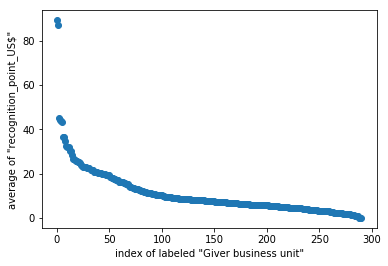

In [58]:
# 2, 'giver_business_unit_name' is also second import feature
df_gb_GBUN=df.groupby('giver_business_unit_name').mean().sort_values(by=['recognition_points_US$'],ascending=False)

plt.scatter(range(df_gb_GBUN.shape[0]),df_gb_GBUN['recognition_points_US$'])
plt.xlabel('index of labeled "Giver business unit"')
plt.ylabel('average of "recognition_point_US$"')
plt.savefig('GBU_avg_RPU')

In [86]:
# The first 10 "giver_business_unit" with large average recognition points are: 
df_gb_GBUN.index[:10]

Int64Index([-6033589982344335151, -2772652933074923629, -1602335562583428075,
            -4830324189249560730, -8630711160444276502,   150112596185221332,
             7013784171120343415, -1064809838137528189,  4843904553664534046,
             8252055201647422052],
           dtype='int64', name='giver_business_unit_name')

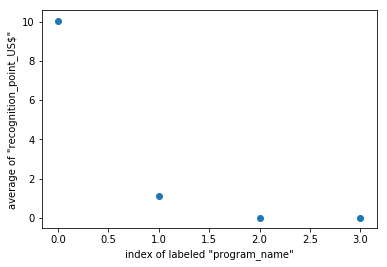

In [143]:
# 3, check the "program_name" feature
df_gb_PN=df.groupby('program_name').mean().sort_values(by=['recognition_points_US$'],ascending=False)

plt.scatter(range(df_gb_GBUN.shape[0]),df_gb_GBUN['recognition_points_US$'])
plt.xlabel('index of labeled "program_name"')
plt.ylabel('average of "recognition_point_US$"')
plt.savefig('GBU_avg_RPU')

In [92]:
# sorted list of program_name
df_gb_PN.index

Int64Index([ 7954989090292389888,  5687181466619199488, -4129849837429291008,
             3751865152827545088],
           dtype='int64', name='program_name')

## so the mean of "recognition_point_US" of program_name as  "7954989090292389888" is the largest 

# Conclusion :
### 1, For 1st component, The most important two feature is "receiver_business_unit_name" as weight is 0.8013 and "Giver_business_unit_name" as weight is 0.5381; The 3rd feature is "program_name" and 4th feature is "giver_parent_business_unit_name"
### 2, The date type data, such as "giver_effective_year" and "receiver_effective_day" also effect the data clustering, which are as we expected on data_cleaning_analysis section;

### 3, for 3rd component and 4th component, the most important features are "giver_gender" and "receiver_gender"

### 4, so, for feature ranking: "receiver_business_unit_name" >"giver_business_unit_name">''program_name" >"giver_parent_business_unit_name" >"giver_gender" and "receiver_gender" >other feature

### 5, randomforest and decision tree model have best performance

## appendiex 
### Analysis with other algorithm

# 1,Bayesian

In [94]:
GNB=GaussianNB()
GNB.fit(x_train,y_encode_train)



GaussianNB(priors=None)

In [95]:
# validation: tune parameter 
y_gbn=GNB.predict(x_validation)
accuracy_score(y_gbn,y_encode_validation)

0.5609852216748769

In [96]:
# test the model of overfitting 
y_test_predict=GNB.predict(x_test)
accuracy_score(y_test_predict,y_encode_test)

0.5616585040812927

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


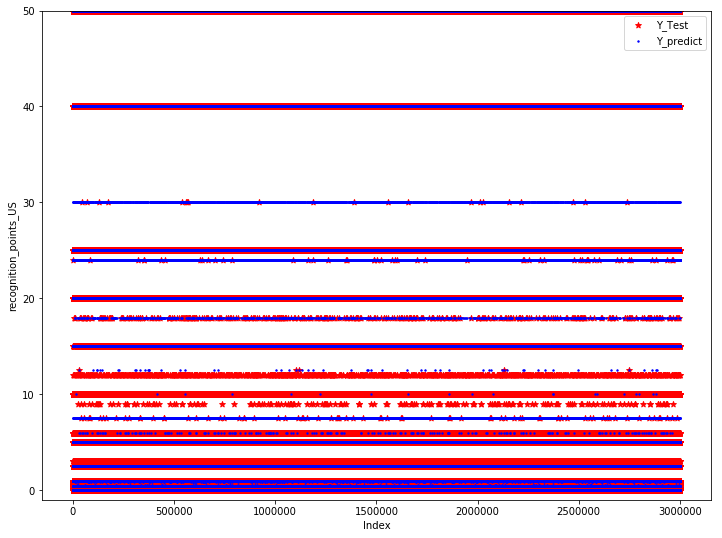

In [98]:
plt.figure(figsize=(12,9))
plt.scatter(range(len(y_encode_test)),recog_encod.inverse_transform(y_encode_test),color='red',marker='*',label='Y_Test')
plt.scatter(range(len(y_test_predict)),recog_encod.inverse_transform(y_test_predict),color='blue',s=2, label='Y_predict')
plt.xlabel('Index')
plt.ylabel('recognition_points_US')
plt.ylim(-1,50)
plt.legend(bbox_to_anchor=(1, 1),loc=1)

# using nerual network

In [107]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from numpy import argmax

In [103]:
from keras.utils.np_utils import to_categorical

y_cat=to_categorical(y_encode_train)

In [104]:
Model=Sequential()

In [110]:
Model.add(Dense(8,activation='linear',input_shape=(28,)))
Model.add(Dense(y_cat.shape[1],activation='softmax'))   # using softmax as output 
Model.compile(loss='categorical_crossentropy',optimizer='adam')
# using crossentropy as matrix 

In [111]:
Model.fit(x_train,y_cat,batch_size=20000,epochs=5)

Epoch 1/5
5602800/5602800 [==============================] - 21s 4us/step - loss: 2.8007
Epoch 2/5
5602800/5602800 [==============================] - 20s 4us/step - loss: 2.0657
Epoch 3/5
5602800/5602800 [==============================] - 21s 4us/step - loss: 2.0407
Epoch 4/5
5602800/5602800 [==============================] - 20s 4us/step - loss: 2.0364
Epoch 5/5
5602800/5602800 [==============================] - 20s 4us/step - loss: 2.0348


In [112]:
y_nn_predict=Model.predict(x_test)

In [113]:
accuracy_score(y_encode_test,argmax(y_nn_predict,axis=1))

0.2600583041812427

## even after tuning parameter, the neural network perform very poor, the reason is that 
## the number of 'recognition_points_US$' as 38 is larger than dimension of data as 28